In [167]:
# https://github.com/STOR-i/GaussianProcesses.jl/blob/master/notebooks/Regression.ipynb

In [1]:
using GaussianProcesses
using Random
using Plots

In [3]:
Random.seed!(20140430)

MersenneTwister(20140430)

In [4]:
# training data
n = 10
x = 2π * rand(n)
y = sin.(x) + 0.05*randn(n);

In [18]:
mZero = MeanZero()
kern = SE(2., 0.)


# this is very important to be a float!
# otherwise optimisation wont work
# https://github.com/STOR-i/GaussianProcesses.jl/issues/211
logObsNoise = -2.0 # log standard deviation of observation noise
# fit gp

gp = GP(x, y, mZero, kern, logObsNoise)

GP Exact object:
  Dim = 1
  Number of observations = 10
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [2.0, 0.0]
  Input observations = 
[4.854610892030431 5.176527683588912 … 1.9941157865846477 3.4567590405289352]
  Output observations = [-0.9672931901680022, -1.0070469610508248, -1.0903962829715461, 0.8811208605233783, -0.3332131916909575, -0.9769651482106089, 0.9159341732111771, 0.7362180710829012, 0.9508490881368652, -0.3064317818816142]
  Variance of observation noise = 0.01831563888873418
  Marginal Log-Likelihood = -21.972

In [213]:
μ, σ² = predict_y(gp, range(0,2π,length=100))

([1.0193372986269758, 1.0038020143267676, 0.9880335129549582, 0.9720355160046772, 0.9558118415817738, 0.9393664030219284, 0.9227032074528765, 0.905826354302544, 0.8887400337536491, 0.871448525145734  …  -0.7160524018091685, -0.7316011901006583, -0.7469148256921123, -0.7619898716756559, -0.7768229930192874, -0.7914109576943389, -0.8057506377443637, -0.8198390102952615, -0.8336731585062367, -0.8472502724610393], [0.028782230015540214, 0.0281789285310476, 0.027611044201683657, 0.0270774064976987, 0.02657684645030041, 0.026108197787588508, 0.025670298064576394, 0.025261989786354147, 0.024882121523471204, 0.024529549018620214  …  0.023229372029866704, 0.023484158048725237, 0.023762262757526867, 0.024064826708818224, 0.02439300298079579, 0.024747956065551316, 0.025130860741516672, 0.02554290093107199, 0.02598526854429191, 0.026459162309841536])

┌ Warning: Attribute alias `color` detected in the user recipe defined for the signature (::GPE{LinearAlgebra.Adjoint{Float64, Vector{Float64}}, Vector{Float64}, MeanZero, SEIso{Float64}, GaussianProcesses.FullCovariance, GaussianProcesses.IsotropicData{Matrix{Float64}}, PDMats.PDMat{Float64, Matrix{Float64}}, GaussianProcesses.Scalar{Float64}}). To ensure expected behavior it is recommended to use the default attribute `seriescolor`.
└ @ Plots /Users/spx8sk/.julia/packages/Plots/CBYO0/src/pipeline.jl:26


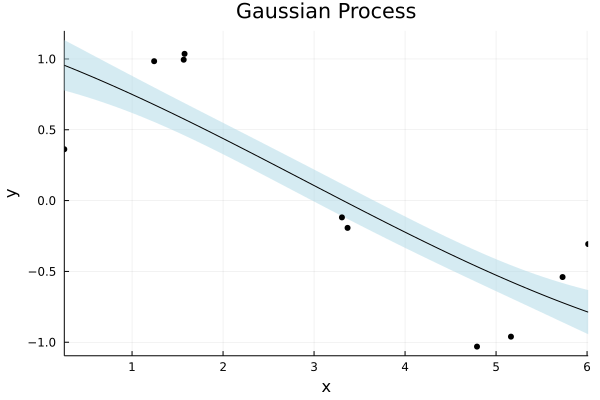

In [214]:
plot(gp; xlabel="x", ylabel="y", title="Gaussian Process", legend=false, fmt=:png)

In [215]:
# optimize hyperparameters

In [216]:
using Optim

In [217]:
optimize!(gp; kernbounds = [[-20, -20], [20, 20]])

 * Status: success

 * Candidate solution
    Final objective value:     -4.918976e+00

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 2.29e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.90e-08 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 1.31e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    3
    f(x) calls:    75
    ∇f(x) calls:   75


In [218]:
# the optimizer can fail if too far away from the solution
# next we use HMC to find best fit parameters much
# more successfully

┌ Warning: Attribute alias `color` detected in the user recipe defined for the signature (::GPE{LinearAlgebra.Adjoint{Float64, Vector{Float64}}, Vector{Float64}, MeanZero, SEIso{Float64}, GaussianProcesses.FullCovariance, GaussianProcesses.IsotropicData{Matrix{Float64}}, PDMats.PDMat{Float64, Matrix{Float64}}, GaussianProcesses.Scalar{Float64}}). To ensure expected behavior it is recommended to use the default attribute `seriescolor`.
└ @ Plots /Users/spx8sk/.julia/packages/Plots/CBYO0/src/pipeline.jl:26


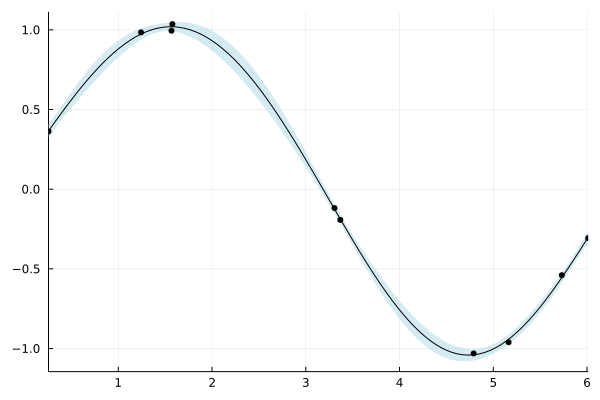

In [219]:
plot(gp; legend=false, fmt=:png)   #Plot the GP after the hyperparameters have been optimised

Number of iterations = 1000, Thinning = 1, Burn-in = 1 
Step size = 0.100000, Average number of leapfrog steps = 9.994000 
Number of function calls: 9995
Acceptance rate: 0.972000 


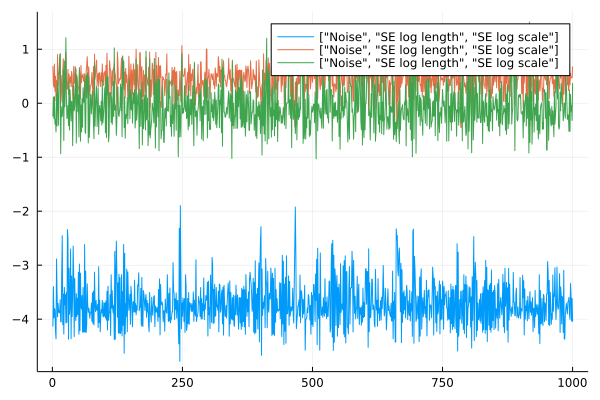

In [227]:
using Distributions

set_priors!(kern, [Normal(0,1), Normal(0,1)]) # Uniform(0,1) distribution assumed by default if priors not specified
chain = mcmc(gp)
plot(chain', label=["Noise", "SE log length", "SE log scale"]; fmt=:png)

┌ Warning: Attribute alias `color` detected in the user recipe defined for the signature (::GPE{LinearAlgebra.Adjoint{Float64, Vector{Float64}}, Vector{Float64}, MeanZero, SEIso{Float64}, GaussianProcesses.FullCovariance, GaussianProcesses.IsotropicData{Matrix{Float64}}, PDMats.PDMat{Float64, Matrix{Float64}}, GaussianProcesses.Scalar{Float64}}). To ensure expected behavior it is recommended to use the default attribute `seriescolor`.
└ @ Plots /Users/spx8sk/.julia/packages/Plots/CBYO0/src/pipeline.jl:26


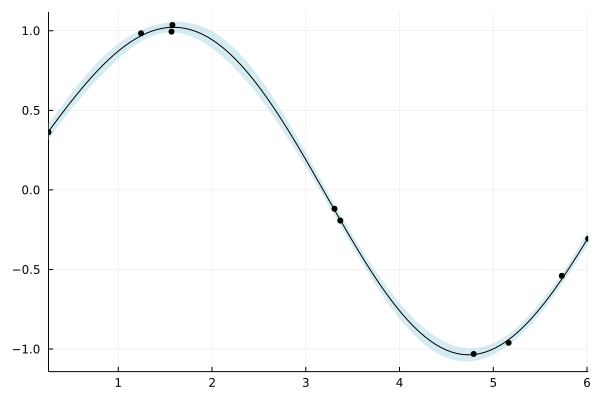

In [221]:
plot(gp; legend=false, fmt=:png)   #Plot the GP after the hyperparameters have been optimised

Number of iterations = 1000, Thinning = 1, Burn-in = 1 
Number of function calls: 5949
Acceptance rate: 0.202061 


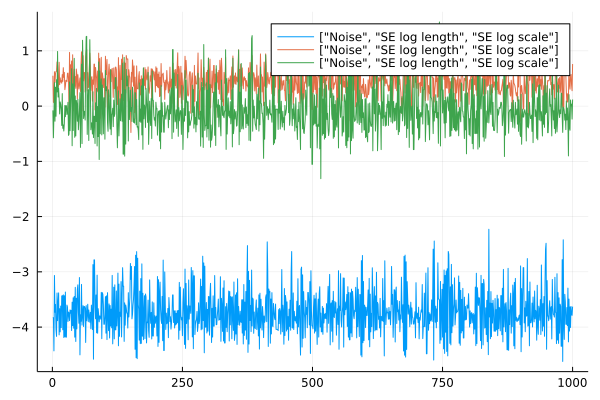

In [222]:
mZero = MeanZero()                   #Zero mean function
kern = SE(0.0,0.0)                   #Sqaured exponential kernel (note that hyperparameters are on the log scale)
logObsNoise = -10.0                        # log standard deviation of observation noise (this is optional)

gpess = GP(x, y, mZero, kern, )       #Fit the GP

set_priors!(kern, [Normal(), Normal()]) # Uniform(0,1) distribution assumed by default if priors not specified
set_priors!(gpess.logNoise, [Distributions.Normal(-1.0, 1.0)])
ess_chain = ess(gpess)
plot(chain', label=["Noise", "SE log length", "SE log scale"]; fmt=:png)

In [223]:
mhmc = mean(chain, dims=2)
mess = mean(ess_chain, dims=2)

3×1 Matrix{Float64}:
 -3.080799497688554
  0.3843434421257812
 -0.09360593458104846

In [224]:
for (a, b) in zip(mhmc, mess)
    eq = abs(a-b)
    idx = max(abs(a), abs(b))
    return eq < idx/5
end

true

┌ Warning: Attribute alias `color` detected in the user recipe defined for the signature (::GPE{LinearAlgebra.Adjoint{Float64, Vector{Float64}}, Vector{Float64}, MeanZero, SEIso{Float64}, GaussianProcesses.FullCovariance, GaussianProcesses.IsotropicData{Matrix{Float64}}, PDMats.PDMat{Float64, Matrix{Float64}}, GaussianProcesses.Scalar{Float64}}). To ensure expected behavior it is recommended to use the default attribute `seriescolor`.
└ @ Plots /Users/spx8sk/.julia/packages/Plots/CBYO0/src/pipeline.jl:26


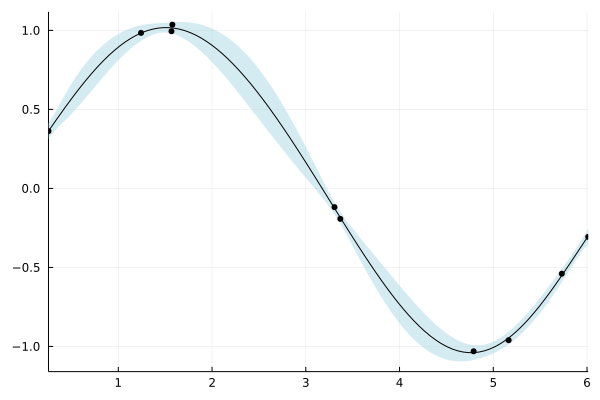

In [225]:
plot(gpess; legend=false, fmt=:png)   #Plot the GP after the hyperparameters have been optimised